# Supervised machine learning
Supervised machine learning is a technique for configuring (learning) parameters of a computational model based on annotated data. In this example, we provide sparsely annotated data, which means we only annotate some of the given data points.

See also
* [Supervised learning (Wikipedia)](https://en.wikipedia.org/wiki/Supervised_learning)
* [Supervised learning in scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

Our starting point for demonstrating supervised machine learning is a a pair of measurements in a bimodal distribution. In the following data set objects with a larger area are typically also more elongated.

Text(0, 0.5, 'elongation')

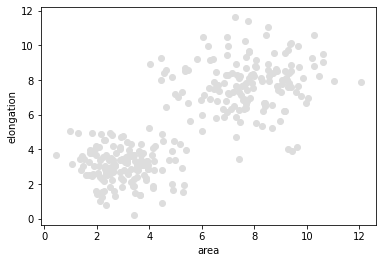

In [2]:
data = generate_biomodal_2d_data()

plt.scatter(data[:, 0], data[:, 1], c='#DDDDDD')
plt.xlabel('area')
plt.ylabel('elongation')

To get a more detailed insight into the data, we print out the first entries.

In [3]:
data_to_annotate = data[:20]

pd.DataFrame(data_to_annotate, columns=["area", "elongation"])

,area,elongation
0,3.950088,2.848643
1,4.955912,3.390093
2,7.469852,5.575289
3,2.544467,3.017479
4,3.465662,1.463756
5,3.156507,3.232181
6,9.978705,6.676372
7,6.001683,5.047063
8,2.457139,3.416050
9,3.672295,3.407462


## Annotating data
As mentioned above, supervised machine learning algorithms need some form of annotation, also called _ground truth_. We create a list of annotations where `1` represents small objects and `2` represents large and elongated objects.

In [4]:
manual_annotation = [1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2]

Now, we visualize the measurements again and draw the annotated measurements on top.

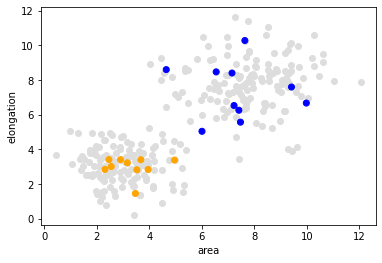

In [5]:
plt.scatter(data[:, 0], data[:, 1], c='#DDDDDD')
plt.xlabel('area')
plt.ylabel('elongation')

colors = ['orange', 'blue']
annotated_colors = [colors[i-1] for i in manual_annotation]

plt.scatter(data_to_annotate[:, 0], data_to_annotate[:, 1], c=annotated_colors)

## Classifier training
With the selected data to annotate and the manual annotation, we can train a [Random Forest Classifier](https://en.wikipedia.org/wiki/Random_forest).

In [6]:
classifier = RandomForestClassifier()
classifier.fit(data_to_annotate, manual_annotation)

RandomForestClassifier()

## Prediction
With the trained classifier, we can process the whole data set. We can _classify_ the data points, or create a _prediction_ of the class.

In [7]:
prediction = classifier.predict(data)
prediction

array([1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2])

Here we now visualize the whole data set with class colors.

Text(0, 0.5, 'elongation')

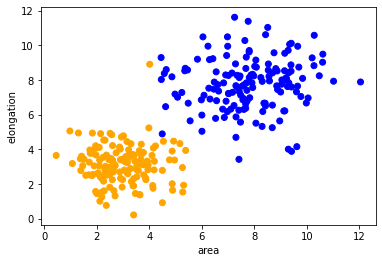

In [8]:
predicted_colors = [colors[i-1] for i in prediction]

plt.scatter(data[:, 0], data[:, 1], c=predicted_colors)
plt.xlabel('area')
plt.ylabel('elongation')

## Exercise
Train a [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html) and visualize its prediction.

In [9]:
from sklearn.svm import SVC

classifier = SVC()